## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
filtered_df = application_df.drop(columns=["NAME", "EIN", "SPECIAL_CONSIDERATIONS", "STATUS"])
filtered_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [ ]:
# Determine the number of unique values in each column.
unique_value_counts = filtered_df.nunique()
unique_value_counts

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [3]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = filtered_df['APPLICATION_TYPE'].value_counts()

# Print the value counts
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
cutoff_value = 1000
app_type_counts = filtered_df['APPLICATION_TYPE'].value_counts()

# use the variable name `application_types_to_replace`
application_types_to_replace = app_type_counts[app_type_counts <= cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    filtered_df['APPLICATION_TYPE'] = filtered_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
filtered_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_count = filtered_df['CLASSIFICATION'].value_counts()

# Print the value counts
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# Choose a cutoff value and create a list of classifications to be replaced
cutoff = 4000

# use the variable name `classifications_to_replace`
classifications_to_replace = classification_count[classification_count < cutoff].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    filtered_df['CLASSIFICATION'] = filtered_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
filtered_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [8]:
# Display Updated dataframe
filtered_df.head(10)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,Other,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1
5,T3,Independent,C1200,Preservation,Trust,0,5000,1
6,T3,Independent,C1000,Preservation,Trust,100000-499999,31452,1
7,T3,Independent,C2000,Preservation,Trust,10M-50M,7508025,1
8,Other,Independent,C1000,ProductDev,Trust,1-9999,94389,1
9,T5,CompanySponsored,Other,ProductDev,Association,0,5000,0


In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_data = pd.get_dummies(filtered_df)

In [10]:
# Display the numeric data
numeric_data.head(10)

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,108590,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5000,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,6692,1,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,142590,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
5,5000,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
6,31452,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
7,7508025,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8,94389,1,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
9,5000,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
# Split our preprocessed data into our features and target arrays
y = numeric_data['IS_SUCCESSFUL'].values
X = numeric_data.drop(['IS_SUCCESSFUL'], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

<ipython-input-11-99181702457f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = numeric_data.drop(['IS_SUCCESSFUL'], 1).values


In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train[0])
hidden_nodes_l1 = 30
hidden_nodes_l2 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l1, activation='tanh', input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l2, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1080      
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1401 (5.47 KB)
Trainable params: 1401 (5.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=80)

Epoch 1/80
804/804 [==============================] - 6s 4ms/step - loss: 0.5921 - accuracy: 0.7046
Epoch 2/80
804/804 [==============================] - 4s 5ms/step - loss: 0.5661 - accuracy: 0.7261
Epoch 3/80
804/804 [==============================] - 3s 4ms/step - loss: 0.5615 - accuracy: 0.7276
Epoch 4/80
804/804 [==============================] - 2s 2ms/step - loss: 0.5595 - accuracy: 0.7297
Epoch 5/80
804/804 [==============================] - 4s 4ms/step - loss: 0.5581 - accuracy: 0.7285
Epoch 6/80
804/804 [==============================] - 4s 5ms/step - loss: 0.5571 - accuracy: 0.7289
Epoch 7/80
804/804 [==============================] - 4s 5ms/step - loss: 0.5563 - accuracy: 0.7300
Epoch 8/80
804/804 [==============================] - 3s 3ms/step - loss: 0.5551 - accuracy: 0.7297
Epoch 9/80
804/804 [==============================] - 2s 2ms/step - loss: 0.5547 - accuracy: 0.7310
Epoch 10/80
804/804 [==============================] - 1s 2ms/step - loss: 0.5543 - accuracy: 0.7297

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5613 - accuracy: 0.7258 - 500ms/epoch - 2ms/step
Loss: 0.5613073706626892, Accuracy: 0.7258309125900269


In [17]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)
# Increase the index by 1 to match the number of epochs
history_df.index += 1


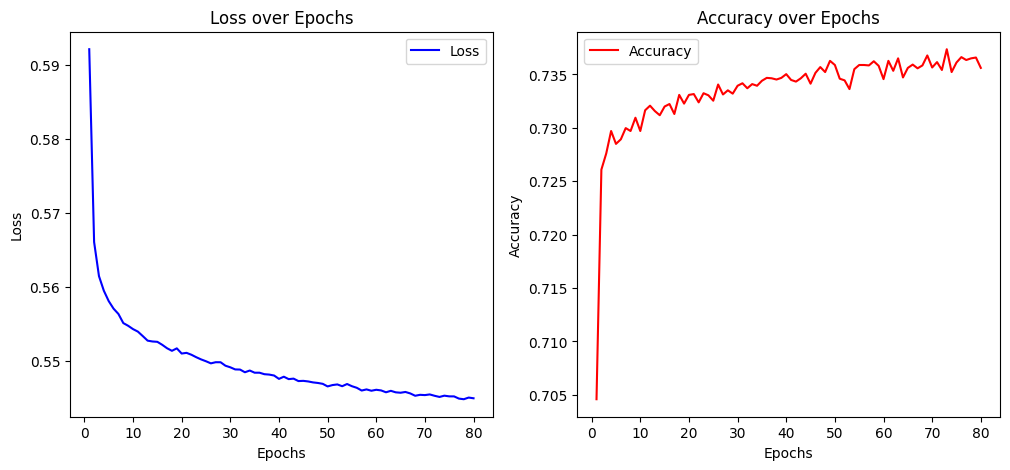

In [18]:
# Plotting loss and accuracy
# Create a figure with two subplots (one for loss, one for accuracy)
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot loss on the first subplot (ax1)
ax1.plot(history_df.index, history_df['loss'], label='Loss', color='b')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Loss over Epochs')
ax1.legend()

# Plot accuracy on the second subplot (ax2)
ax2.plot(history_df.index, history_df['accuracy'], label='Accuracy', color='r')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy over Epochs')
ax2.legend()

# Display the plots
plt.show()



In [19]:
# Export our model to HDF5 file
from google.colab import files

nn.save('AlphabetSoupCharityOpt3.h5')
files.download('AlphabetSoupCharityOpt3.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>